In [1]:
from helpers.plot import compare_audios
from helpers.audio_utils import trim_audio
from helpers.path_utils import get_base_dir
from helpers.sam import StudentAuscultationManikin

AUDIO_NAME = "SAM-Normal Heart Sounds 110 BPM.wav"
mobile_dir = get_base_dir().joinpath("data", "mobile", "SAM", AUDIO_NAME)
stethos_dir = get_base_dir().joinpath("data", "stethos", "SAM", AUDIO_NAME)

SNIPPET_SECS = 5
DOWNSAMPLE_FACTOR = 100
PEAKS_HEIGHT = 0.7
PEAKS_PROMINENCE = 0.0001

In [2]:
sam = StudentAuscultationManikin()

mobile, stethos, sample_rate = sam.load_recordings(str(mobile_dir), str(stethos_dir))

mobile, stethos = sam.match_heartbeats(
    mobile_audio=mobile,
    stethos_audio=stethos,
    sample_rate=sample_rate,
    snippet_secs=SNIPPET_SECS,
    downsample_factor=DOWNSAMPLE_FACTOR,
    peaks_height=PEAKS_HEIGHT,
    peaks_prominence=PEAKS_PROMINENCE,
)

mobile.shape, stethos.shape

(torch.Size([1, 474900]), torch.Size([1, 474900]))

In [3]:
START_AT = None
END_AT = 5

mobile_snippet = trim_audio(mobile, sample_rate, START_AT, END_AT)
stethos_snippet = trim_audio(stethos, sample_rate, START_AT, END_AT)

mobile.shape, mobile_snippet.shape

(torch.Size([1, 474900]), torch.Size([1, 20000]))

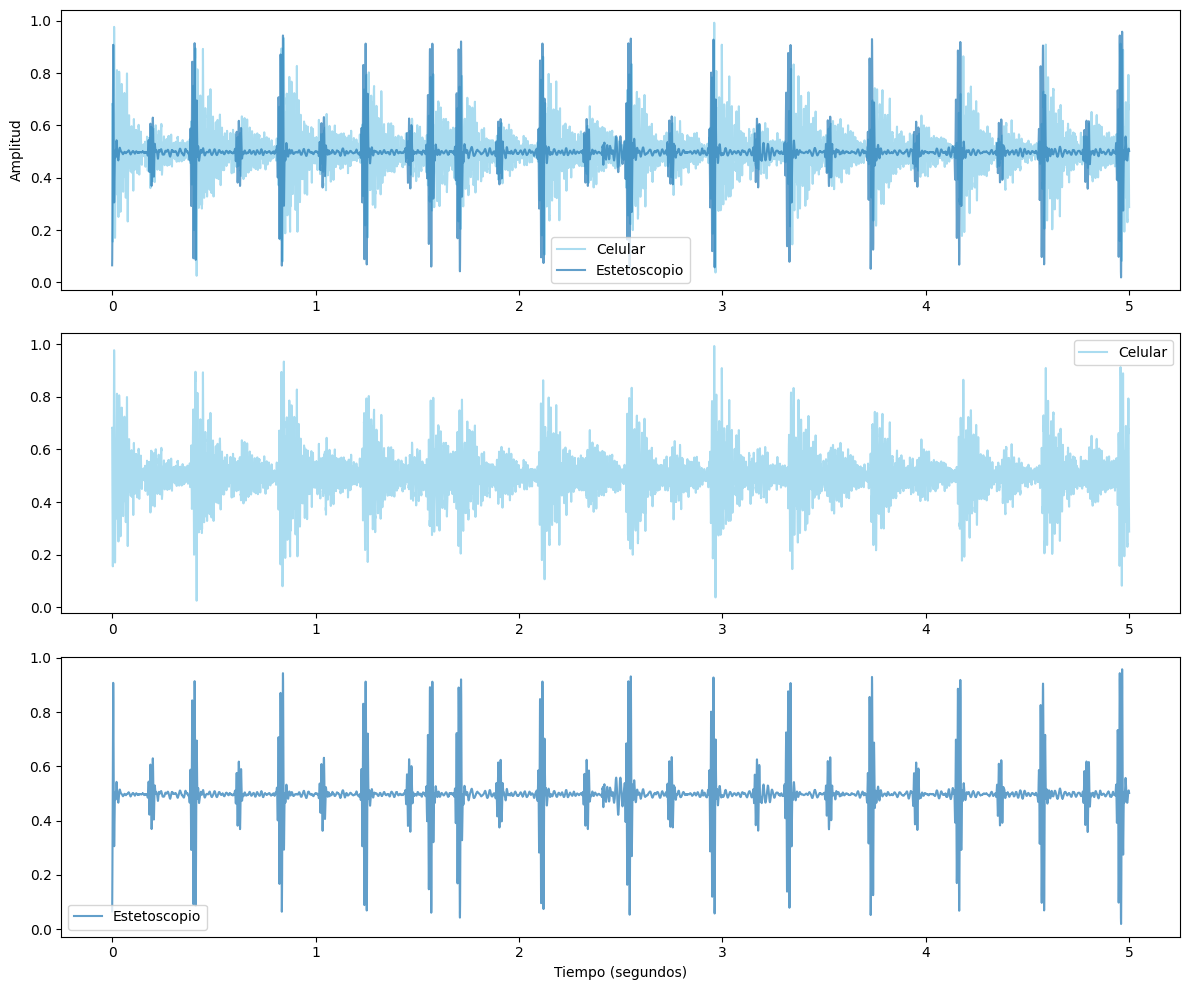

In [4]:
compare_audios(
    first_audio=mobile_snippet.squeeze(),
    first_title="Celular",
    second_audio=stethos_snippet.squeeze(),
    second_title="Estetoscopio",
    sample_rate=sample_rate,
)